In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("seismic-bumps.csv")

In [3]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


## Feature preprocessing (light)

In [4]:
#remove useless variables from the dataset
column2drop = ['seismoacoustic', 'gdpuls', 'hazard','nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy']
df.drop(column2drop, axis=1, inplace=True)

In [5]:
df.head()

,seismic,shift,genergy,gpuls,gdenergy,nbumps,class
0,a,N,15180,48,-72,0,0
1,a,N,14720,33,-70,1,0
2,a,N,8050,30,-81,0,0
3,a,N,28820,171,-23,1,0
4,a,N,12640,57,-63,0,0


## Pattern mining preprocessing

In [6]:
#numero tra parentesi è numero di bin, divide in quartili
df['genergyBin'] = pd.qcut(df['genergy'], 4)
df['gpulsBin'] = pd.qcut(df['gpuls'], 4)
df['gdenergyBin'] = pd.qcut(df['gdenergy'], 4)
df['nbumpsBin'] = pd.cut(df['nbumps'], 4)

df.drop(['nbumps', 'gdenergy', 'genergy', 'gpuls'], axis=1, inplace=True)

In [7]:
df.head()

,seismic,shift,class,genergyBin,gpulsBin,gdenergyBin,nbumpsBin
0,a,N,0,"(11660.0, 25485.0]","(1.999, 190.0]","(-96.001, -37.0]","(-0.009, 2.25]"
1,a,N,0,"(11660.0, 25485.0]","(1.999, 190.0]","(-96.001, -37.0]","(-0.009, 2.25]"
2,a,N,0,"(99.999, 11660.0]","(1.999, 190.0]","(-96.001, -37.0]","(-0.009, 2.25]"
3,a,N,0,"(25485.0, 52832.5]","(1.999, 190.0]","(-37.0, -6.0]","(-0.009, 2.25]"
4,a,N,0,"(11660.0, 25485.0]","(1.999, 190.0]","(-96.001, -37.0]","(-0.009, 2.25]"


In [8]:
df['genergyBin'] = df['genergyBin'].astype(str) + '_gene'
df['gdenergyBin'] = df['gdenergyBin'].astype(str) + '_gdene'
df['gpulsBin'] = df['gpulsBin'].astype(str) + '_gpuls'
df['nbumpsBin'] = df['nbumpsBin'].astype(str) + '_bumps'

In [9]:
class_dict = {0: 'non hazardous', 1: 'hazardous'}
df['class'] = df['class'].map(class_dict)

In [10]:
# Transform categorical attributes ('seismic' and 'shift') into numerical ones 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['seismic'] = le.fit_transform(df['seismic'])
df['shift'] = le.fit_transform(df['shift'])

In [11]:
seismic_dict = {0: 'lack of hazard', 1: 'low hazard'}
df['seismic'] = df['seismic'].map(seismic_dict)

shift_dict = {0: 'coal-getting', 1: 'preparation'}
df['shift'] = df['shift'].map(shift_dict)

In [12]:
df.head()

,seismic,shift,class,genergyBin,gpulsBin,gdenergyBin,nbumpsBin
0,lack of hazard,coal-getting,non hazardous,"(11660.0, 25485.0]_gene","(1.999, 190.0]_gpuls","(-96.001, -37.0]_gdene","(-0.009, 2.25]_bumps"
1,lack of hazard,coal-getting,non hazardous,"(11660.0, 25485.0]_gene","(1.999, 190.0]_gpuls","(-96.001, -37.0]_gdene","(-0.009, 2.25]_bumps"
2,lack of hazard,coal-getting,non hazardous,"(99.999, 11660.0]_gene","(1.999, 190.0]_gpuls","(-96.001, -37.0]_gdene","(-0.009, 2.25]_bumps"
3,lack of hazard,coal-getting,non hazardous,"(25485.0, 52832.5]_gene","(1.999, 190.0]_gpuls","(-37.0, -6.0]_gdene","(-0.009, 2.25]_bumps"
4,lack of hazard,coal-getting,non hazardous,"(11660.0, 25485.0]_gene","(1.999, 190.0]_gpuls","(-96.001, -37.0]_gdene","(-0.009, 2.25]_bumps"


In [13]:
X = df.values.tolist()

In [14]:
X[0]

['lack of hazard',
 'coal-getting',
 'non hazardous',
 '(11660.0, 25485.0]_gene',
 '(1.999, 190.0]_gpuls',
 '(-96.001, -37.0]_gdene',
 '(-0.009, 2.25]_bumps']

In [15]:
#non usare
#Y = df.values
#Z = Y[df['class']=='hazardous']
#Z

In [16]:
#!pip install pyfim
from fim import apriori

In [17]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [18]:
#supp=2 ; 0.02
#supp=20 ; 0.2

itemsets = apriori(X, target='s', supp=3, zmin=3, report='S')

In [19]:
itemsets[:5]

[(('hazardous', '(669.0, 4518.0]_gpuls', 'preparation'), 3.3281733746130033),
 (('hazardous', '(52832.5, 2595650.0]_gene', 'preparation'),
  3.4442724458204337),
 (('hazardous', 'low hazard', 'preparation'), 3.2507739938080498),
 (('hazardous', 'preparation', '(-0.009, 2.25]_bumps'), 3.5990712074303404),
 (('(2.25, 4.5]_bumps', '(669.0, 4518.0]_gpuls', '(52832.5, 2595650.0]_gene'),
  3.521671826625387)]

In [20]:
len(itemsets)

901

In [21]:
# frequent itemset
itemsets[0][0]

('hazardous', '(669.0, 4518.0]_gpuls', 'preparation')

In [22]:
# support
itemsets[0][1]

3.3281733746130033

In [23]:
#maximal
itemsets = apriori(X, target='m', supp=3, zmin=3, report='S')

In [24]:
itemsets[:5]

[(('hazardous', '(669.0, 4518.0]_gpuls', 'preparation'), 3.3281733746130033),
 (('hazardous', '(52832.5, 2595650.0]_gene', 'preparation'),
  3.4442724458204337),
 (('hazardous', 'low hazard', 'preparation'), 3.2507739938080498),
 (('hazardous', 'preparation', '(-0.009, 2.25]_bumps'), 3.5990712074303404),
 (('(2.25, 4.5]_bumps',
   '(669.0, 4518.0]_gpuls',
   '(52832.5, 2595650.0]_gene',
   'preparation'),
  3.48297213622291)]

In [25]:
itemsets[0][0]

('hazardous', '(669.0, 4518.0]_gpuls', 'preparation')

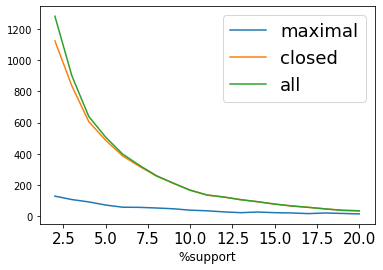

In [26]:
len_max_it = []
len_cl_it = []
len_all_it = []
for i in range(2, 20+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    cl_itemsets = apriori(X, target='c', supp=i, zmin=3)
    all_itemsets = apriori(X, target='s', supp=i, zmin=3)
    len_max_it.append( len(max_itemsets)  )
    len_cl_it.append( len(cl_itemsets) )
    len_all_it.append( len(all_itemsets)  )
    
plt.plot(range(2, len(len_max_it) + 2), len_max_it, label='maximal')
plt.plot(range(2, len(len_cl_it) + 2), len_cl_it, label='closed')
plt.plot(range(2, len(len_max_it) + 2), len_all_it, label='all')
plt.legend(fontsize=18)
plt.xticks(fontsize=15)
plt.xlabel('%support', fontsize=12)

plt.show()

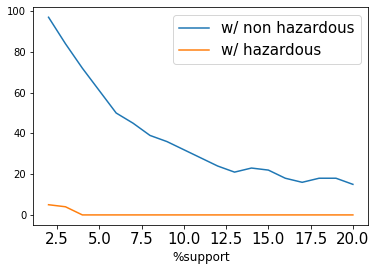

In [27]:
filter_1 = []
filter_2 = []
for i in range(2, 20+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    
    filter_1.append( len([item for item in max_itemsets if 'non hazardous' in item[0]])  )
    filter_2.append( len([item for item in max_itemsets if 'hazardous' in item[0]]) )
    
plt.plot(range(2, len(filter_1) + 2), filter_1, label='w/ non hazardous')
plt.plot(range(2, len(filter_1) + 2), filter_2, label='w/ hazardous')
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('%support', fontsize=12)
#va fatto partire da 2 la x
plt.show()

In [28]:
rules = apriori(X, target='r', supp=2, zmin=3, conf=30, report='aScl')

In [29]:
len (rules)

5572

In [30]:
rules[:5]
#Supporto in val assoluto
#Supporto in percentuale
#confidenza
#Lift

for i in range(0, 5):
    print('Rule:', rules[i][1], '->', rules[i][0])
    print('Support in absolute value: ', rules[i][2])
    print('Support in percentage: ', rules[i][3])
    print('Confidence: ', rules[i][4])
    print('Lift: ', rules[i][5], '\n')

Rule: ('(4.5, 6.75]_bumps', 'preparation') -> (-6.0, 38.0]_gdene
Support in absolute value:  21
Support in percentage:  0.8126934984520124
Confidence:  0.3181818181818182
Lift:  1.278665347094585 

Rule: ('(4.5, 6.75]_bumps', 'preparation') -> (669.0, 4518.0]_gpuls
Support in absolute value:  24
Support in percentage:  0.9287925696594427
Confidence:  0.36363636363636365
Lift:  1.456800563777308 

Rule: ('(4.5, 6.75]_bumps', 'preparation') -> (379.0, 669.0]_gpuls
Support in absolute value:  22
Support in percentage:  0.8513931888544891
Confidence:  0.3333333333333333
Lift:  1.3354005167958656 

Rule: ('(4.5, 6.75]_bumps', 'preparation') -> (52832.5, 2595650.0]_gene
Support in absolute value:  42
Support in percentage:  1.6253869969040249
Confidence:  0.6363636363636364
Lift:  2.5454545454545454 

Rule: ('(4.5, 6.75]_bumps', 'preparation') -> (25485.0, 52832.5]_gene
Support in absolute value:  20
Support in percentage:  0.7739938080495357
Confidence:  0.30303030303030304
Lift:  1.2121212

In [31]:
#A=np.zeros(0)
#for a in range (0,403):
#    if rules[a][0]=="hazardous":
#        np.append(rules[a][0], rules[a][1])

In [32]:
print(rules[0])
print('')
print(rules[0][2])
print('')
print(rules[0][1][0])

('(-6.0, 38.0]_gdene', ('(4.5, 6.75]_bumps', 'preparation'), 21, 0.8126934984520124, 0.3181818181818182, 1.278665347094585)

21

(4.5, 6.75]_bumps


In [33]:
K= []
for a in range(0, len(rules)):
    if rules[a][0] == "hazardous":
        K.append(rules[a])

print('lenght of K: ', len(K))
K[:5]

lenght of K:  6


[('hazardous',
  ('(2.25, 4.5]_bumps',
   '(669.0, 4518.0]_gpuls',
   '(52832.5, 2595650.0]_gene',
   'low hazard',
   'preparation'),
  20,
  0.7739938080495357,
  0.3389830508474576,
  5.1525423728813555),
 ('hazardous',
  ('(2.25, 4.5]_bumps',
   '(669.0, 4518.0]_gpuls',
   '(52832.5, 2595650.0]_gene',
   'low hazard'),
  20,
  0.7739938080495357,
  0.3389830508474576,
  5.1525423728813555),
 ('hazardous',
  ('(2.25, 4.5]_bumps', '(669.0, 4518.0]_gpuls', 'low hazard', 'preparation'),
  21,
  0.8126934984520124,
  0.3387096774193548,
  5.148387096774194),
 ('hazardous',
  ('(2.25, 4.5]_bumps', '(669.0, 4518.0]_gpuls', 'low hazard'),
  21,
  0.8126934984520124,
  0.3387096774193548,
  5.148387096774194),
 ('hazardous',
  ('(2.25, 4.5]_bumps',
   '(52832.5, 2595650.0]_gene',
   'low hazard',
   'preparation'),
  21,
  0.8126934984520124,
  0.31343283582089554,
  4.764179104477612)]

In [34]:
for a in range(0, len(K)):
    print(K[a][1], '\n','->' ,K[a][0], '\n')    

('(2.25, 4.5]_bumps', '(669.0, 4518.0]_gpuls', '(52832.5, 2595650.0]_gene', 'low hazard', 'preparation') 
 -> hazardous 

('(2.25, 4.5]_bumps', '(669.0, 4518.0]_gpuls', '(52832.5, 2595650.0]_gene', 'low hazard') 
 -> hazardous 

('(2.25, 4.5]_bumps', '(669.0, 4518.0]_gpuls', 'low hazard', 'preparation') 
 -> hazardous 

('(2.25, 4.5]_bumps', '(669.0, 4518.0]_gpuls', 'low hazard') 
 -> hazardous 

('(2.25, 4.5]_bumps', '(52832.5, 2595650.0]_gene', 'low hazard', 'preparation') 
 -> hazardous 

('(2.25, 4.5]_bumps', '(52832.5, 2595650.0]_gene', 'low hazard') 
 -> hazardous 



sesmic's first 5 values:  ['a' 'a' 'a' 'a' 'a']
shift's first 5 values:  ['N' 'N' 'N' 'N' 'N']
sesmic's first 5 values:  [0 0 0 0 0]
shift's first 5 values:  [0 0 0 0 0]
Resampled dataset shape Counter({0: 1448, 1: 1448})
Model with rank: 1
Mean validation score: 0.194 (std: 0.359)
Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.194 (std: 0.359)
Parameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.194 (std: 0.359)
Parameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 5}

Model with rank: 1
Mean validation score: 0.194 (std: 0.359)
Parameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.194 (std: 0.359)
Parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.194 (std: 0.359)
Parameters: 

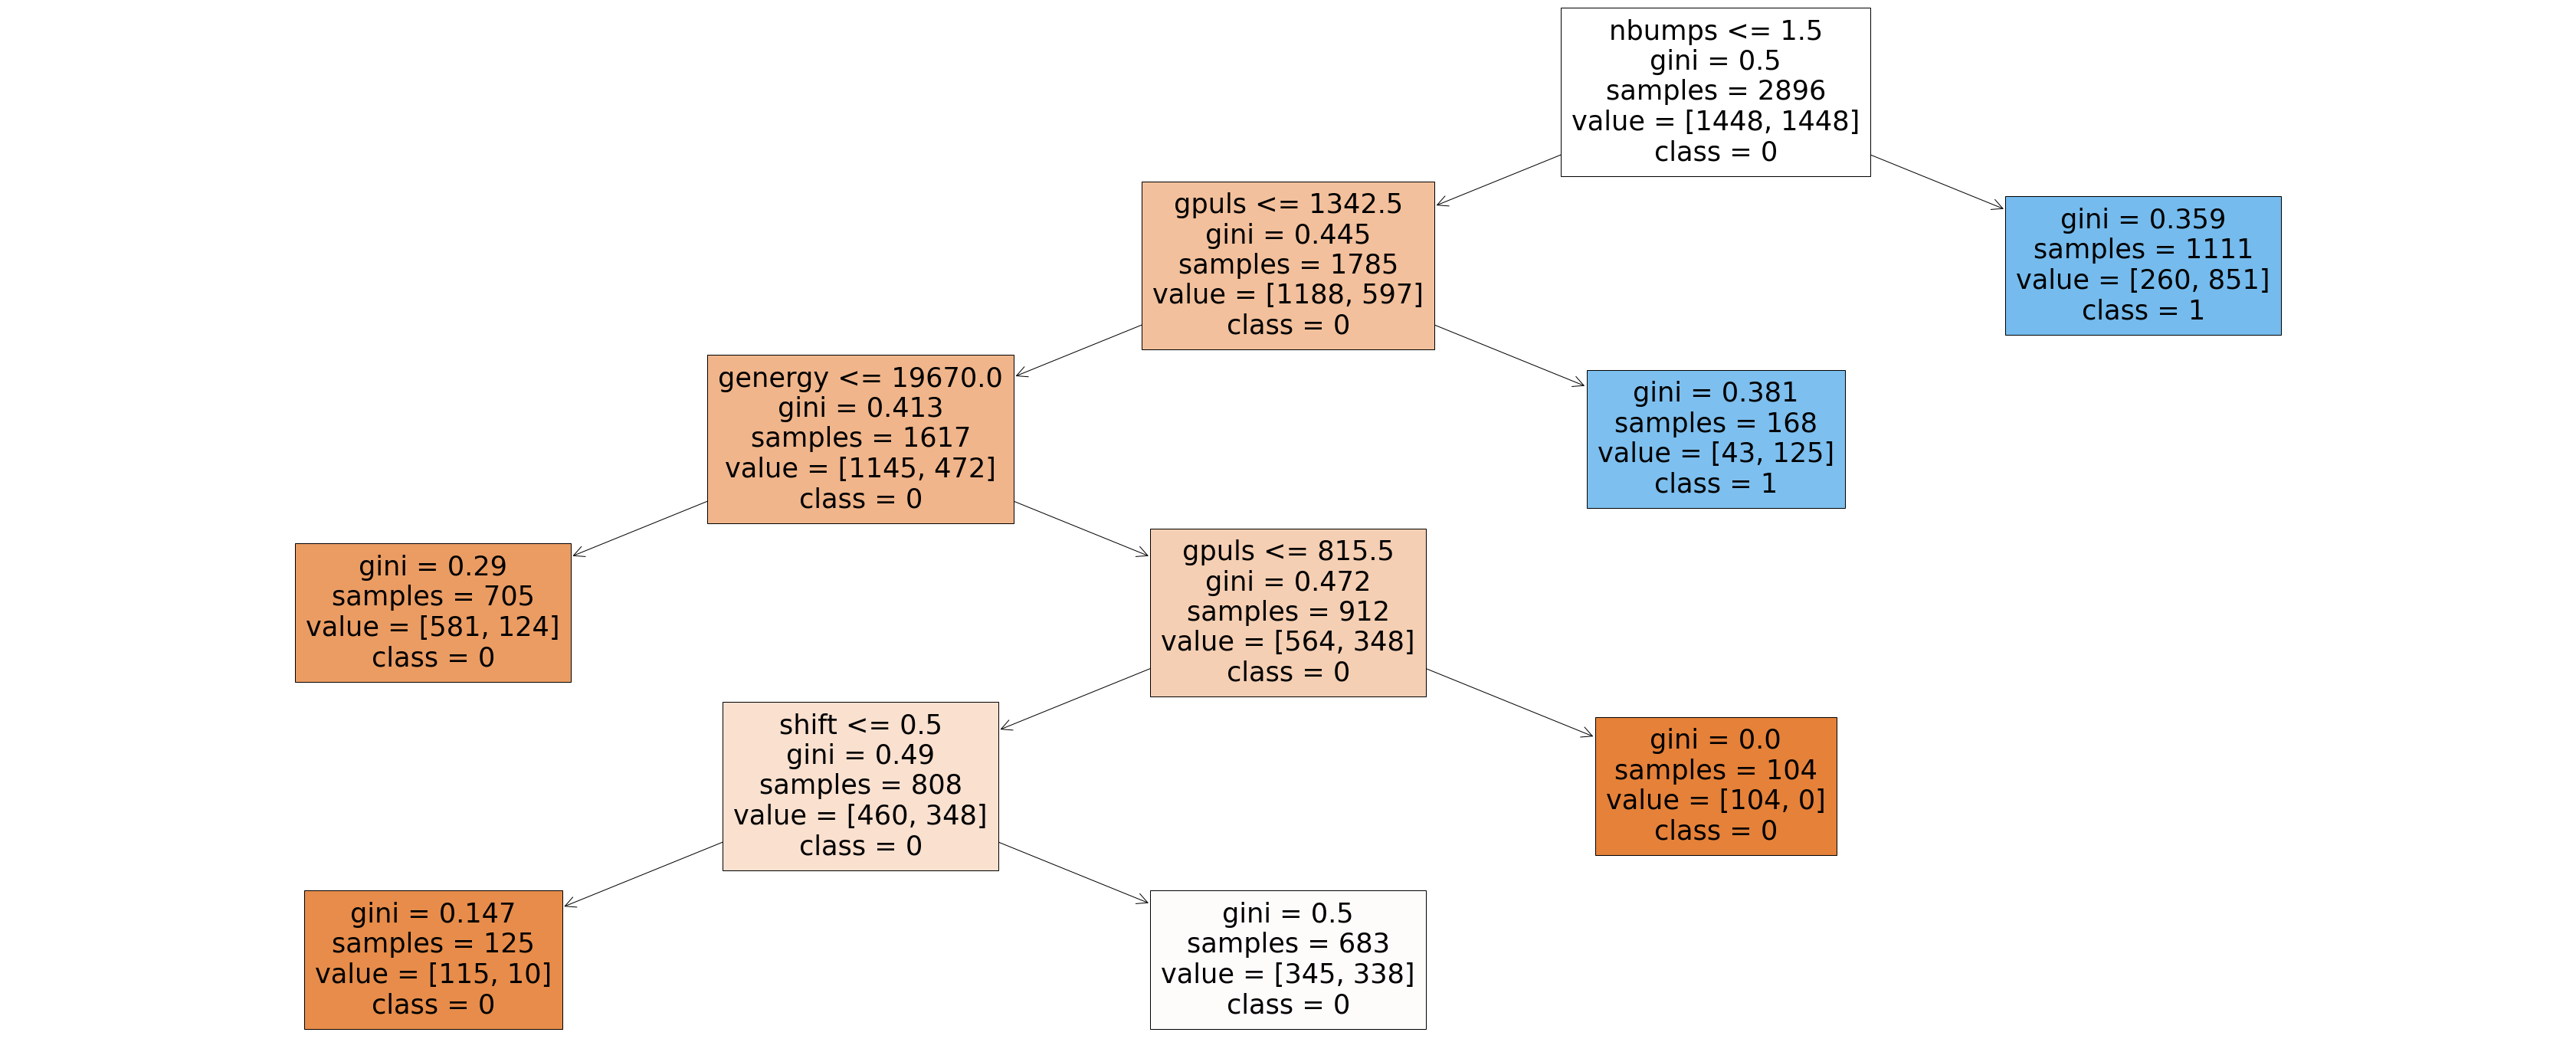

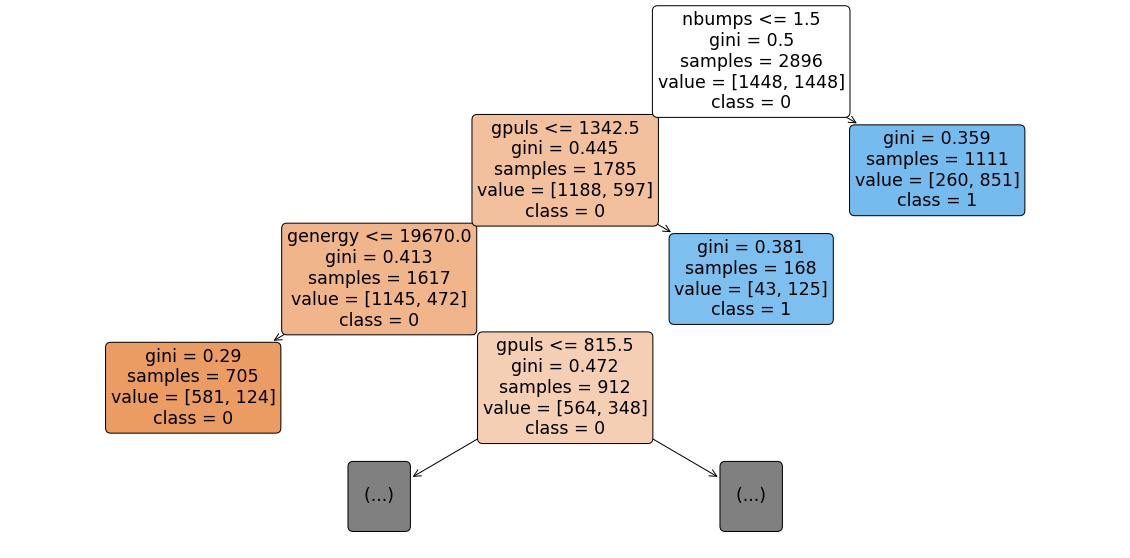

TRAINING-SET
Accuracy 0.7825806451612903
F1 [0.87171679 0.28752643] 

TEST-SET
Accuracy 0.8220502901353965
F1 [0.89709172 0.34285714]
TRAINING-SET
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1448
           1       0.18      0.67      0.29       102

    accuracy                           0.78      1550
   macro avg       0.58      0.73      0.58      1550
weighted avg       0.92      0.78      0.83      1550
 


TEST-SET
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       483
           1       0.23      0.71      0.34        34

    accuracy                           0.82       517
   macro avg       0.60      0.77      0.62       517
weighted avg       0.93      0.82      0.86       517

TRAINING-SET
[[  68   34]
 [ 303 1145]] 

TEST-SET
[[ 24  10]
 [ 82 401]]
TRAINING-SET:  68 34 303 1145
TEST-SET:      24 10 82 401
TRAINING-SET
[[0.04387097 0.02193548]
 [0.19548387 0.73

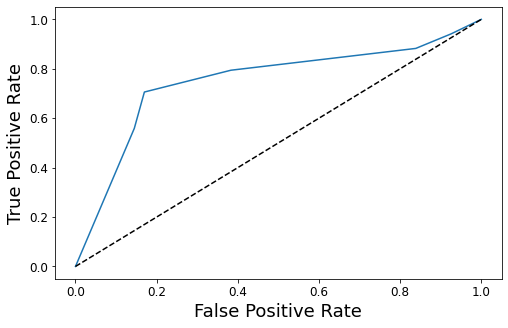

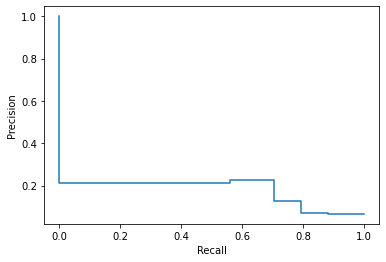

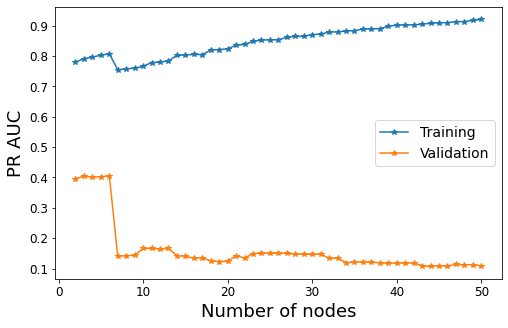

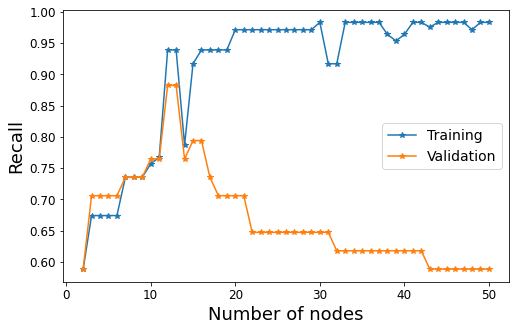

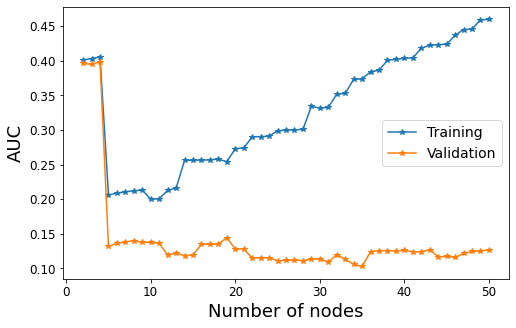

Accuracy 0.7988394584139265
F1 [0.88720174 0.07142857]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       483
           1       0.05      0.12      0.07        34

    accuracy                           0.80       517
   macro avg       0.49      0.48      0.48       517
weighted avg       0.87      0.80      0.83       517

0.09371281380262911


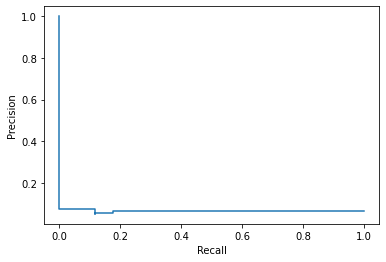

In [35]:
%run classification.ipynb

In [49]:
rules_pred = []

def prediction(X_test):
    for i in range(0, len(X_test)):
        if X_test[i][2] in range( 52832, 2595650 ):
            if X_test[i][3] in range( 669, 4518 ):
                if X_test[i][4] in range( 3, 5 ):
                    rules_pred.append(1)
                else: rules_pred.append(0)
            else: rules_pred.append(0)
        else: rules_pred.append(0)
        
        
prediction(X_test)
print(rules_pred)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [50]:
len(rules_pred)

517

In [51]:
print( classification_report(y_test, rules_pred) )

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       483
           1       0.29      0.12      0.17        34

    accuracy                           0.92       517
   macro avg       0.61      0.55      0.56       517
weighted avg       0.90      0.92      0.91       517



In [55]:
confusion_matrix(y_test, rules_pred, labels=[1,0])

array([[  4,  30],
       [ 10, 473]], dtype=int64)

In [56]:
confusion_matrix(y_test, y_test_pred, labels=[1,0])

array([[ 24,  10],
       [ 82, 401]], dtype=int64)

In [ ]:
X_test

In [ ]:
# <--
rules[0][0], rules[0][1]

In [ ]:
# asbolute support
rules[0][2]

In [ ]:
# support as percentage
rules[0][3]

In [ ]:
# confidence
rules[0][4]

In [ ]:
# lift
rules[0][5]

In [ ]:
K= []
for a in range(0, len(rules)):
    if rules[a][0] == "hazardous":
        K.append(rules[a])
        
K

In [ ]:
for r in rules:
    if r[0] == 'hazardous':
        print(r)
        
r

In [ ]:
[r for r in rules if r[0] == 'hazardous'][0]

In [ ]:
print( 'to_predict:', [r for r in rules if r[0] == 'hazardous'][0][0])
print( 'how?', [r for r in rules if r[0] == 'hazardous'][0][1])

In [ ]:
# left for exercise

# using the same test set for classification (w/ random_state):
# predict the target variable with the most interesting rule:
# .... e.g., the most frequent;
# .... e.g., the one w/ max lift
# build a list of prediction, e.g. ['Survived', 'Not Survived', 'Survived']
# evaluate this prediction with precision/recall/confusion matrix etc.

In [37]:
len_r = []
for i in range(1, 20+1): #support
    len_r_wrt_i = []
    for j in range(30, 70+1): #confidence
        rules = apriori(X, target='r', supp=i, zmin=3, conf=j, report='aScl')
        
        len_r_wrt_i.append(len(rules)) # study your characteristics/properties here
        
    len_r.append(len_r_wrt_i)

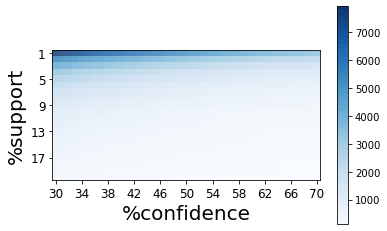

In [51]:
plt.imshow( len_r, cmap='Blues', alpha=0.8 )
plt.xlabel('%confidence', fontsize=20)
plt.ylabel('%support', fontsize=20)
plt.xticks( np.arange(0,40+1,4), np.arange(30,70+1,4), fontsize=12)
plt.yticks( np.arange(0,19+1,4), np.arange(1,20+1,4), fontsize=12  )
plt.colorbar()

plt.show()

In [ ]:
# left for exercise

# using the same test set for classification (w/ random_state):
# predict the target variable with the most interesting rule:
# .... e.g., the most frequent;
# .... e.g., the one w/ max lift
# build a list of prediction, e.g. ['Survived', 'Not Survived', 'Survived']
# evaluate this prediction with precision/recall/confusion matrix etc.

In [ ]:
%run classification.ipynb

In [ ]:
help(y_test_pred)

In [ ]:
for i in range(0, y_test_pred.size):
    if y_test_pred[i] == 1:
        print("shift: {}.".format(X_test[i][1]), "genergy: {}".format(X_test[i][2]), "gpuls: {}".format(X_test[i][3]), "nbumps: {}".format(X_test[i][4]))

In [ ]:
y_test_pred.size

In [ ]:
y_test_pred

In [ ]:
X_test